<a href="https://colab.research.google.com/github/Reape4er/neural_network/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8%20%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%203" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.utils import to_categorical
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
# нормализация входных данных
trainX = trainX / 255
testX = testX / 255

trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

# x_train = np.expand_dims(x_train, axis=3)
# x_test = np.expand_dims(x_test, axis=3)

# или

trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print( trainX.shape )

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
print(trainy)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. Визуализируем часть данных из датасета

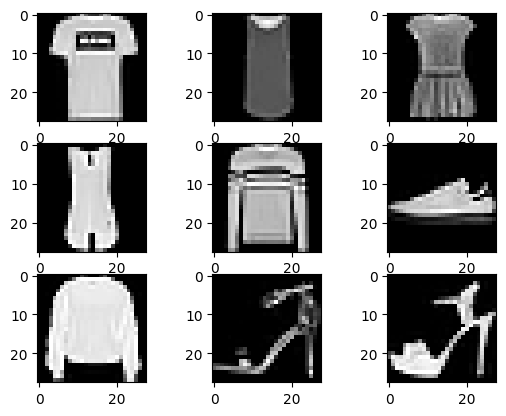

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1.5. Обучаем модель

In [ ]:
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(trainX, trainy, batch_size=32, epochs=EPOCH, validation_split=0.2)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7971 - loss: 0.5727 - val_accuracy: 0.8870 - val_loss: 0.3101
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9003 - loss: 0.2812 - val_accuracy: 0.8995 - val_loss: 0.2742
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.9119 - loss: 0.2384 - val_accuracy: 0.8982 - val_loss: 0.2757
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8944 - loss: 0.2987


[0.29138562083244324, 0.8927000164985657]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

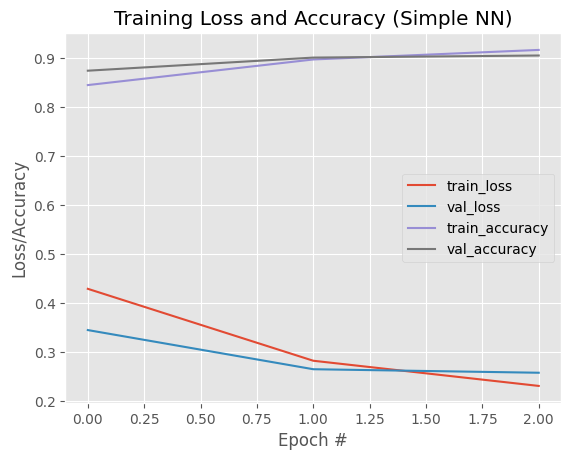

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
testX[:5].shape

(5, 28, 28, 1)

In [ ]:
labels = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]
preds = model.predict(testX[:7])
print(preds)
pred_labels = np.argmax(preds,axis=1)
print(pred_labels)
predicted_class_labels = [labels[idx] for idx in pred_labels]
print(predicted_class_labels)
print(testy[:7])
print([labels[idx] for idx in np.argmax(testy[:7],axis=1)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
[[1.5119858e-06 6.4302398e-08 4.9375192e-08 6.4218534e-07 1.2217395e-08
  1.5536760e-04 2.3041600e-06 4.3131458e-04 3.1433881e-06 9.9940562e-01]
 [4.8052996e-05 3.5864606e-10 9.9814653e-01 2.1175006e-07 2.5560212e-05
  9.1594780e-11 1.7796464e-03 3.7659654e-12 1.4274072e-09 5.9705740e-11]
 [8.6439684e-07 9.9998975e-01 2.3377486e-07 8.7448561e-06 1.2294095e-07
  1.5878658e-10 2.1221656e-07 4.4674056e-12 6.8826893e-08 5.4961067e-11]
 [2.8286072e-06 9.9998295e-01 3.8056226e-07 8.2387178e-06 3.7935217e-06
  1.3753304e-10 1.7716472e-06 3.7312035e-11 1.5146551e-08 6.5860095e-10]
 [4.9749266e-02 7.8540552e-07 1.1308196e-02 2.3520107e-03 1.1527376e-02
  1.0492822e-06 9.2504489e-01 6.1975351e-07 9.5083078e-06 6.4006690e-06]
 [3.3587976e-06 9.9998486e-01 1.9059223e-06 8.4305066e-06 4.0841374e-07
  1.8053713e-09 9.2864207e-07 1.4673351e-11 1.5544866e-07 3.8487580e-10]
 [1.3468711e-04 3.7389434e-06 2.0304455e-01 9.2114988e-06 7.5357974e-01
  2.4460958e-08 4.3

In [ ]:
model.evaluate(testX, testy) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8944 - loss: 0.2987


[0.29138562083244324, 0.8927000164985657]

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip archive.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/r

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [ ]:
# Загрузка и подготовка данных
imagePaths = sorted(list(paths.list_images("raw-img")))
random.shuffle(imagePaths)

data, labels_str = [], []

for imagePath in imagePaths:
    try:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (64, 64))
        data.append(image)
        # Извлекаем строковую метку из названия папки
        label = imagePath.split(os.path.sep)[-2]
        labels_str.append(label)
    except:
        continue

data = np.array(data, dtype="float") / 255.0
labels_str = np.array(labels_str)

# Создаем объект LabelBinarizer
lb = LabelBinarizer()

# Преобразуем строковые метки в бинарный формат
binary_labels = lb.fit_transform(labels_str)

# Выводим результат
print(binary_labels.shape)
print(binary_labels)
display(binary_labels)

X_train, X_test, y_train, y_test = train_test_split(data, binary_labels, test_size=0.2, random_state=0)

import pickle

# Сохранение меток классов
with open('class_labels_1.pkl', 'wb') as f:
    pickle.dump(labels_str, f)

(26179, 10)
[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

(20943, 64, 64, 3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Создаём модель
model_img = Sequential([
    Conv2D(8, (5,5), padding='same', activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(16, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10,  activation='softmax')
])
EPOCHS = 15
# Параметры обучения
INIT_LR = 0.0001

opt = Adam(learning_rate=INIT_LR)
model_img.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


# Callback для сохранения модели после каждой эпохи
checkpoint = ModelCheckpoint('best2.h5', save_best_only=True, monitor='val_loss', mode='min')

# Callback для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, early_stopping]

NameError: name 'Sequential' is not defined

In [ ]:
H = model_img.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS, batch_size=32,
    callbacks=callbacks_list
)

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_alexnet(input_shape=(64, 64, 3), num_classes=10):
    model = models.Sequential()

    # Слой 1: Сверточный слой
    model.add(layers.Conv2D(filters=96, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Слой 2: Сверточный слой
    model.add(layers.Conv2D(filters=256, kernel_size=(5, 5), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Слой 3: Сверточный слой
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
    model.add(layers.ReLU())

    # Слой 4: Сверточный слой
    model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), padding='same'))
    model.add(layers.ReLU())

    # Слой 5: Сверточный слой
    model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Развертка в полносвязные слои
    model.add(layers.Flatten())

    # Слой 6: Полносвязный слой
    model.add(layers.Dense(units=4096))
    model.add(layers.ReLU())

    # Слой 7: Полносвязный слой
    model.add(layers.Dense(units=4096))
    model.add(layers.ReLU())

    # Слой 8: Выходной слой
    model.add(layers.Dense(units=num_classes, activation='softmax'))

    return model

# Создание модели
input_shape = (64, 64, 3)  # Размер входного изображения
num_classes = 10
model = build_alexnet(input_shape, num_classes)

EPOCHS = 15
# Параметры обучения
INIT_LR = 0.0001

opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


# Callback для сохранения модели после каждой эпохи
checkpoint = ModelCheckpoint('best3.h5', save_best_only=True, monitor='val_loss', mode='min')

# Callback для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

callbacks_list = [checkpoint, early_stopping]

H = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS, batch_size=32,
    callbacks=callbacks_list
)

Epoch 1/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2338 - loss: 2.0857

655/655 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.2339 - loss: 2.0854 - val_accuracy: 0.4629 - val_loss: 1.5457
Epoch 2/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4803 - loss: 1.4799

655/655 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.4803 - loss: 1.4798 - val_accuracy: 0.5413 - val_loss: 1.3256
Epoch 3/15
653/655 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5857 - loss: 1.1888

655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5858 - loss: 1.1886 - val_accuracy: 0.6232 - val_loss: 1.1133
Epoch 4/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.6651 - loss: 0.9820 - val_accuracy: 0.6215 - val_loss: 1.1381
Epoch 5/15
653/655 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7133 - loss: 0.8413

655/655 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.7133 - loss: 0.8412 - val_accuracy: 0.6555 - val_loss: 1.0414
Epoch 6/15
653/655 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7690 - loss: 0.6797

655/655 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7690 - loss: 0.6797 - val_accuracy: 0.6736 - val_loss: 0.9955
Epoch 7/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - accuracy: 0.8197 - loss: 0.5388 - val_accuracy: 0.6885 - val_loss: 1.0400
Epoch 8/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.8662 - loss: 0.4056 - val_accuracy: 0.6927 - val_loss: 1.0196
Epoch 9/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9078 - loss: 0.2721 - val_accuracy: 0.6992 - val_loss: 1.0527
Epoch 10/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9369 - loss: 0.1935 - val_accuracy: 0.6474 - val_loss: 1.4891
Epoch 11/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9469 - loss: 0.1604 - val_accuracy: 0.6835 - val_loss: 1.3430


## 2.3. Сохраните полученные модели

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# import
model_1 = tf.keras.models.load_model('my_model.h5')
model_2 = tf.keras.models.load_model('best2.h5')
model_3 = tf.keras.models.load_model('best3.h5')
# Открываем файл в режиме чтения
with open('class_labels.pkl', 'rb') as f:
    # Загружаем данные из файла
    labels_str_1 = pickle.load(f)
# Открываем файл в режиме чтения
with open('class_labels_2.3.pkl', 'rb') as f:
    # Загружаем данные из файла
    labels_str_23 = pickle.load(f)

# Теперь переменная labels_str содержит данные, которые были сохранены в файл
print(labels_str_1)
print(labels_str_23)

['ragno' 'gallina' 'gallina' ... 'ragno' 'gallina' 'cavallo']
['ragno' 'cane' 'cane' ... 'cane' 'cane' 'mucca']



## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
import numpy as np
import tensorflow as tf
import pickle

# Загрузка моделей
model_1 = tf.keras.models.load_model('my_model.h5')
model_2 = tf.keras.models.load_model('best2.h5')
model_3 = tf.keras.models.load_model('best3.h5')

# Загрузка меток классов
with open('class_labels.pkl', 'rb') as f:
    labels_str_1 = pickle.load(f)
with open('class_labels_2.3.pkl', 'rb') as f:
    labels_str_23 = pickle.load(f)

# Предположим, что X_test и y_test уже загружены
# X_test - массив изображений, y_test - соответствующие метки

# Выбираем 15 случайных изображений из тестового набора
indices = np.random.choice(len(X_test), 30, replace=False)
X_sample = X_test[indices]
y_sample = y_test[indices]

# Функция для применения flatten к изображениям
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

# Применяем flatten только для первой модели
X_sample_flatten = flatten_images(X_sample)

# Получаем предсказания от всех трёх моделей
predictions_1 = model_1.predict(X_sample_flatten)
predictions_2 = model_2.predict(X_sample)
predictions_3 = model_3.predict(X_sample)

# Преобразуем предсказания в метки классов
predicted_labels_1 = np.argmax(predictions_1, axis=1)
predicted_labels_2 = np.argmax(predictions_2, axis=1)
predicted_labels_3 = np.argmax(predictions_3, axis=1)

# Преобразуем y_sample из one-hot encoded в индексы классов, если это необходимо
if y_sample.ndim == 2:  # Проверяем, является ли y_sample one-hot encoded
    y_sample_indices = np.argmax(y_sample, axis=1)
else:
    y_sample_indices = y_sample  # Если уже индексы, оставляем как есть

# Сравниваем предсказания с истинными метками
accuracy_1 = np.mean(predicted_labels_1 == y_sample_indices)
accuracy_2 = np.mean(predicted_labels_2 == y_sample_indices)
accuracy_3 = np.mean(predicted_labels_3 == y_sample_indices)

# Выводим точность каждой модели
print(f"Точность модели 1: {accuracy_1 * 100:.2f}%")
print(f"Точность модели 2: {accuracy_2 * 100:.2f}%")
print(f"Точность модели 3: {accuracy_3 * 100:.2f}%")

# Сравниваем предсказания каждой модели
for i in range(15):
    print(f"Изображение {i+1}:")
    print(f"Истинная метка: {labels_str_1[y_sample_indices[i]]}")
    print(f"Предсказание модели 1: {labels_str_1[predicted_labels_1[i]]}")
    print(f"Предсказание модели 2: {labels_str_23[predicted_labels_2[i]]}")
    print(f"Предсказание модели 3: {labels_str_23[predicted_labels_3[i]]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Точность модели 1: 43.33%
Точность модели 2: 63.33%
Точность модели 3: 70.00%
Изображение 1:
Истинная метка: gallina
Предсказание модели 1: ragno
Предсказание модели 2: cane
Предсказание модели 3: cane

Изображение 2:
Истинная метка: farfalla
Предсказание модели 1: cavallo
Предсказание модели 2: scoiattolo
Предсказание модели 3: scoiattolo

Изображение 3:
Истинная метка: ragno
Предсказание модели 1: ragno
Предсказание модели 2: gatto
Предсказание модели 3: ragno

Изображение 4:
Истинная метка: gallina
Предсказание модели 1: ragno
Предсказание модели 2: ragno
Предсказание модели 3: ragno

Изображение 5:
Истинная метка: farfalla
Предсказание модели 1: farfalla
Предсказание модели 2: scoiattolo
Предсказание модели 3: scoiattolo

Изображение 6:
Истинная метка: cane
Предсказание модели 1: cavallo
Предсказание модели 2: cane
Предсказание модели 3: cane

Изображение 7:
Истинная

In [ ]:
# Ваш код

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

*   Новый пункт
*   Новый пункт



### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

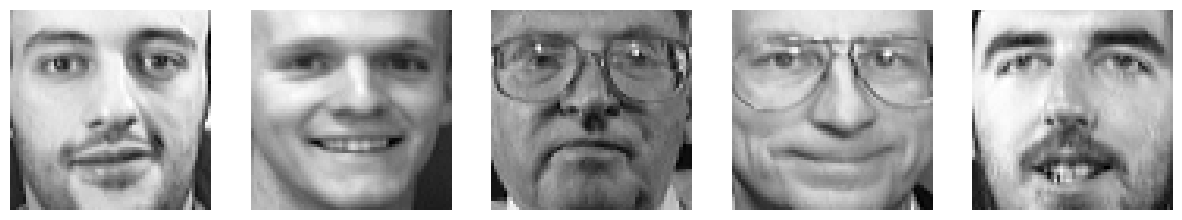

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

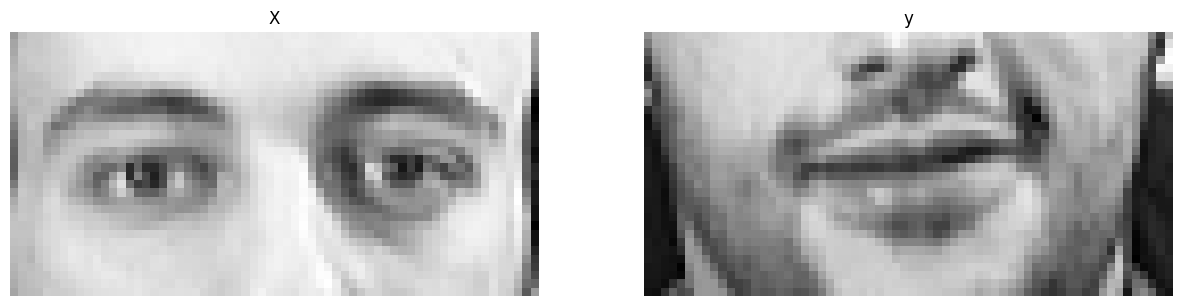

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
input_shape = (32, 64, 1)

model_restore = Sequential()

model_restore.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model_restore.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_restore.add(MaxPooling2D((2, 2), padding='same'))
model_restore.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_restore.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_restore.add(MaxPooling2D((2, 2), padding='same'))

model_restore.add(Flatten())

model_restore.add(Dense(128, activation='relu'))
model_restore.add(Dense(2048, activation='sigmoid'))  # Output layer with sigmoid activation



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
model_restore.compile(optimizer='adam', loss='mse', metrics=['mae'])


## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
EPOCHS = 60

model_restore.fit(X_train.reshape(-1, 32, 64, 1), y_train_n, epochs=EPOCHS, validation_split=0.2, batch_size=8)


Epoch 1/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0251 - mae: 0.1288 - val_loss: 0.0220 - val_mae: 0.1198
Epoch 2/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0222 - mae: 0.1204 - val_loss: 0.0212 - val_mae: 0.1184
Epoch 3/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0214 - mae: 0.1182 - val_loss: 0.0213 - val_mae: 0.1184
Epoch 4/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0200 - mae: 0.1138 - val_loss: 0.0203 - val_mae: 0.1154
Epoch 5/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mae: 0.1110 - val_loss: 0.0174 - val_mae: 0.1051
Epoch 6/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0163 - mae: 0.1012 - val_loss: 0.0157 - val_mae: 0.0985
Epoch 7/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170 - mae: 0.1032 - val_loss: 0.0159 - val_mae: 0.0965
Epoch 8/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0141 - mae: 0.0918 - val_loss: 0.0149 - val_mae: 0.0932
Epoch 9/60
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.013

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
preds = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.09279637038707733

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
print(preds.shape)

(80, 2048)


In [ ]:
pred_test = preds.reshape((preds.shape[0], 32, 64))

Отрисуйте все предсказания.

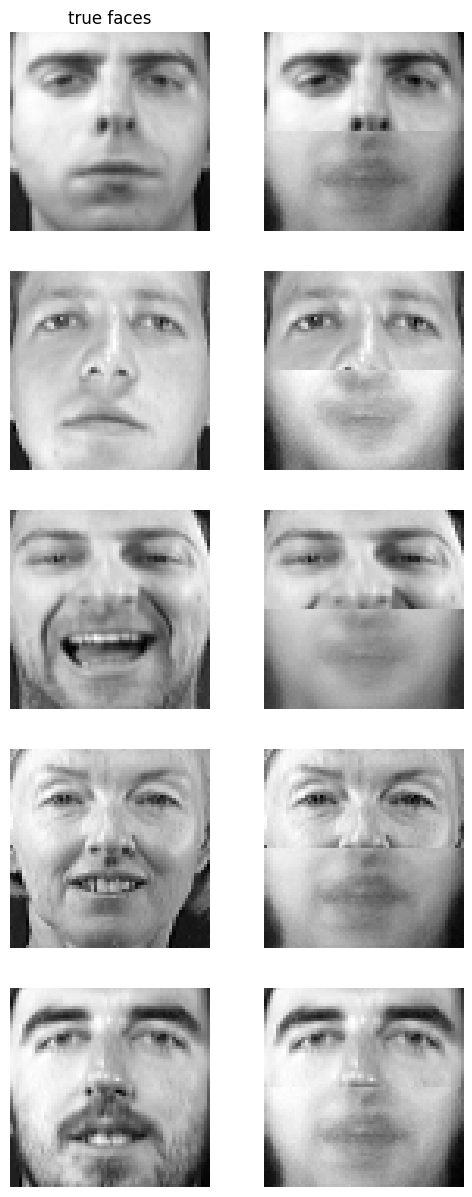

In [ ]:
# Пример кода:
import numpy as np

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )